## EXPLORATORY DATA ANALYSIS

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define paths relative to the notebook location
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
PROCESSED_DIR = os.path.join(BASE_DIR, "data", "processed")
DATA_FILE = os.path.join(PROCESSED_DIR, "IBM_processed.parquet")

# Load the processed data
df = pd.read_parquet(DATA_FILE)
print("Data loaded successfully. Shape:", df.shape)
df.head()

Data loaded successfully. Shape: (6376, 6)


,Date,Open,High,Low,Close,Volume
0,1999-11-01,98.50,98.81,96.37,96.75,9551800
1,1999-11-02,96.75,96.81,93.69,94.81,11105400
2,1999-11-03,95.87,95.94,93.50,94.37,10369100
3,1999-11-04,94.44,94.44,90.00,91.56,16697600
4,1999-11-05,92.75,92.94,90.19,90.25,13737600


In [3]:
# Data Overview
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6376 non-null   datetime64[ns]
 1   Open    6376 non-null   float64       
 2   High    6376 non-null   float64       
 3   Low     6376 non-null   float64       
 4   Close   6376 non-null   float64       
 5   Volume  6376 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 299.0 KB


In [4]:
print("\nDataset description:")
df.describe()


Dataset description:


,Date,Open,High,Low,Close,Volume
count,6376,6376.000000,6376.000000,6376.000000,6376.000000,6.376000e+03
mean,2012-07-03 18:23:15.734002688,133.119941,134.325802,131.993333,133.187976,5.881742e+06
min,1999-11-01 00:00:00,54.650000,56.700000,54.010000,55.070000,1.027500e+06
25%,2006-03-06 18:00:00,102.090000,103.750000,100.777500,102.290000,3.724686e+06
50%,2012-07-02 12:00:00,129.500000,130.490000,128.420000,129.530000,5.036950e+06
75%,2018-10-31 06:00:00,158.812500,160.097500,157.757500,158.857500,7.082200e+06
max,2025-03-07 00:00:00,265.710000,265.720000,262.150000,264.740000,4.120730e+07
std,NaN,38.039788,38.157593,37.929566,38.072900,3.293903e+06


In [5]:
print("\nMissing Values")
df.isnull().sum()


Missing Values


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
print("Data types:")
df.dtypes

Data types:


Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

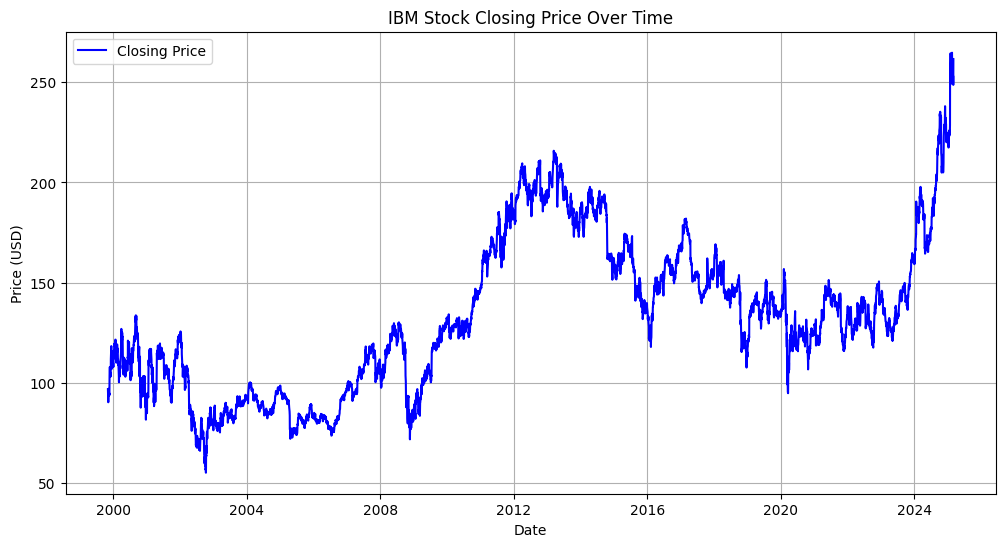

In [7]:
# Time Series plot
df["Date"] = pd.DataFrame(df["Date"])
plt.figure(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue")
plt.title("IBM Stock Closing Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

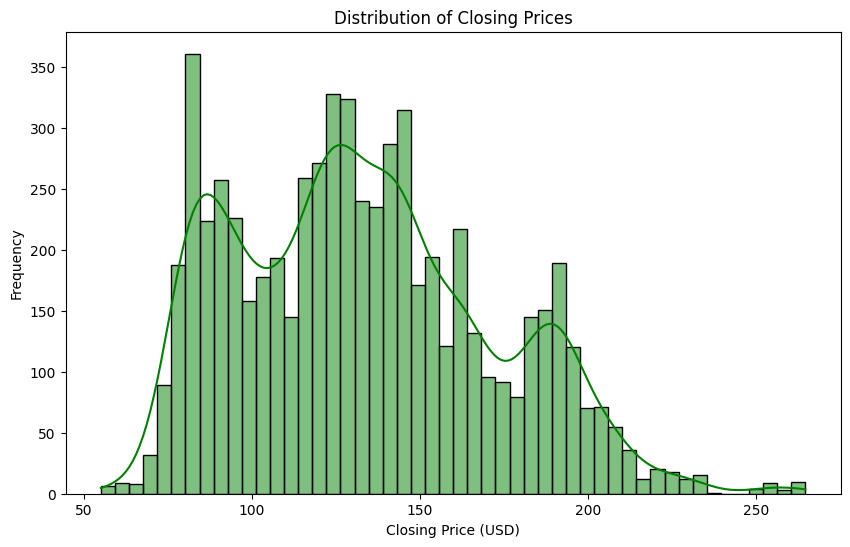

In [8]:
# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df["Close"], bins=50, kde=True, color="green")
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.show

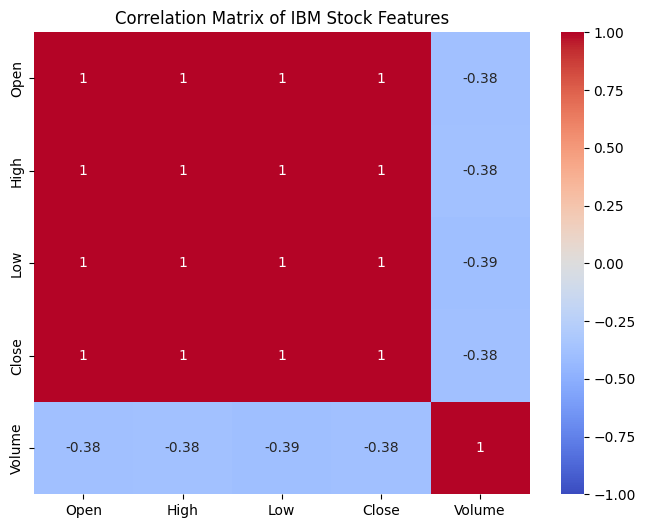

In [9]:
# Correlation Heatmap
corr = df[["Open", "High", "Low", "Close", "Volume"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of IBM Stock Features")
plt.show()

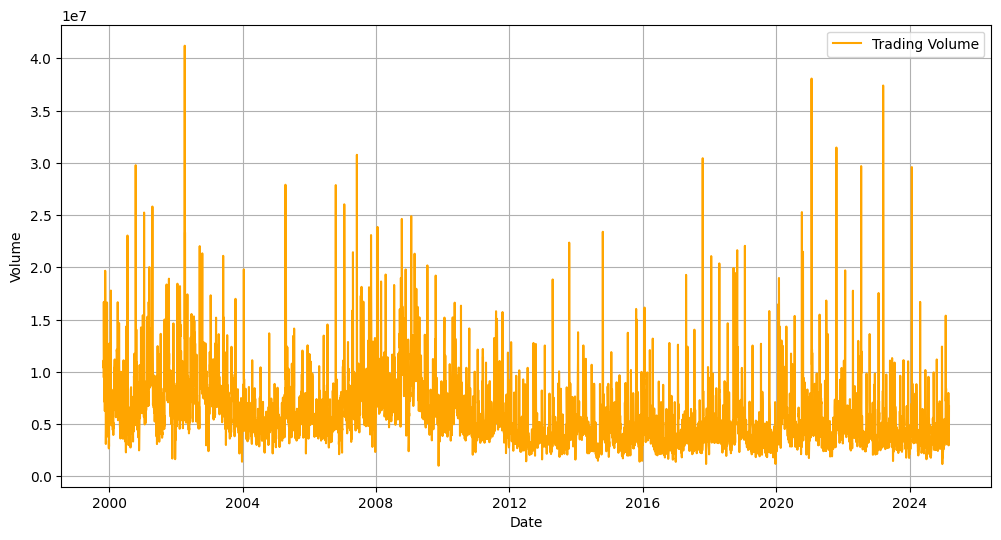

In [10]:
# Volume Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Volume"], label="Trading Volume", color="orange")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

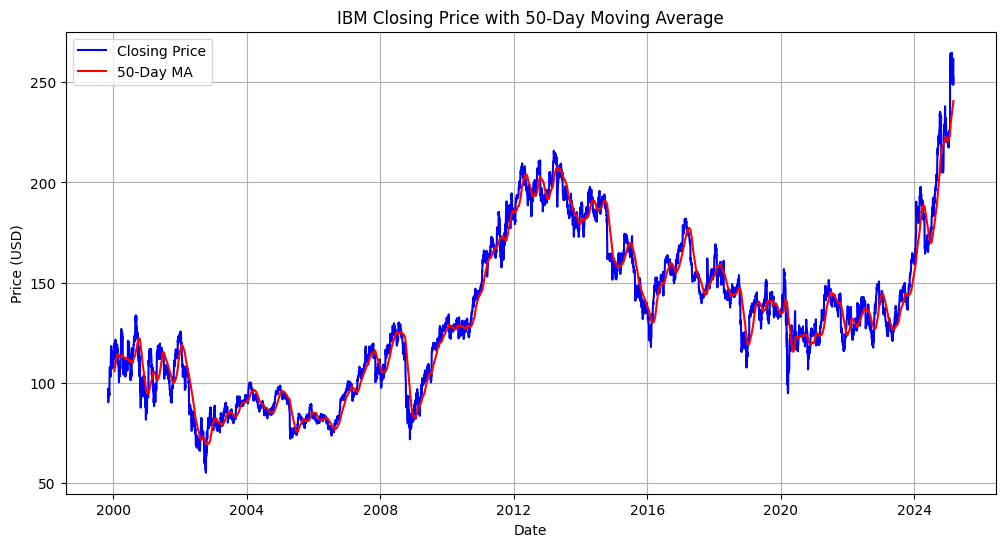

In [11]:
# Moving Average
df['MA50'] = df['Close'].rolling(window=50).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='red')
plt.title('IBM Closing Price with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

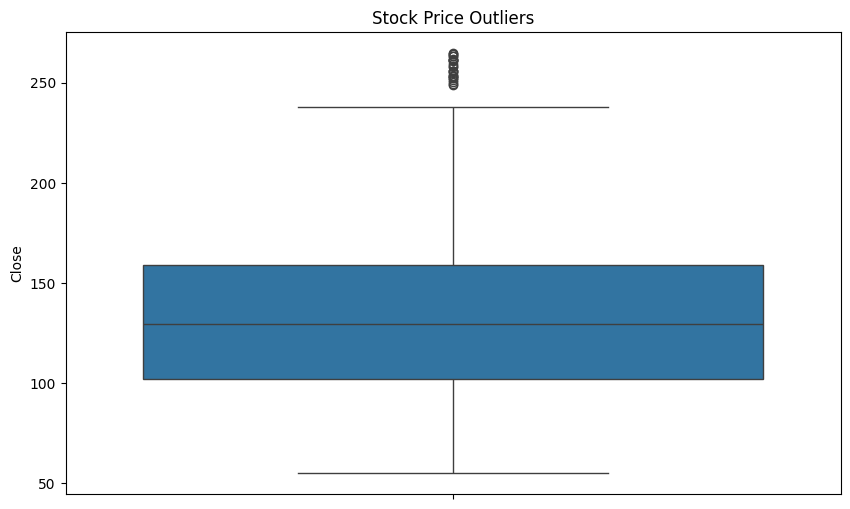

In [12]:
# Outliers detection
plt.figure(figsize=(10, 6))
sns.boxplot(df['Close'])
plt.title("Stock Price Outliers")
plt.show()

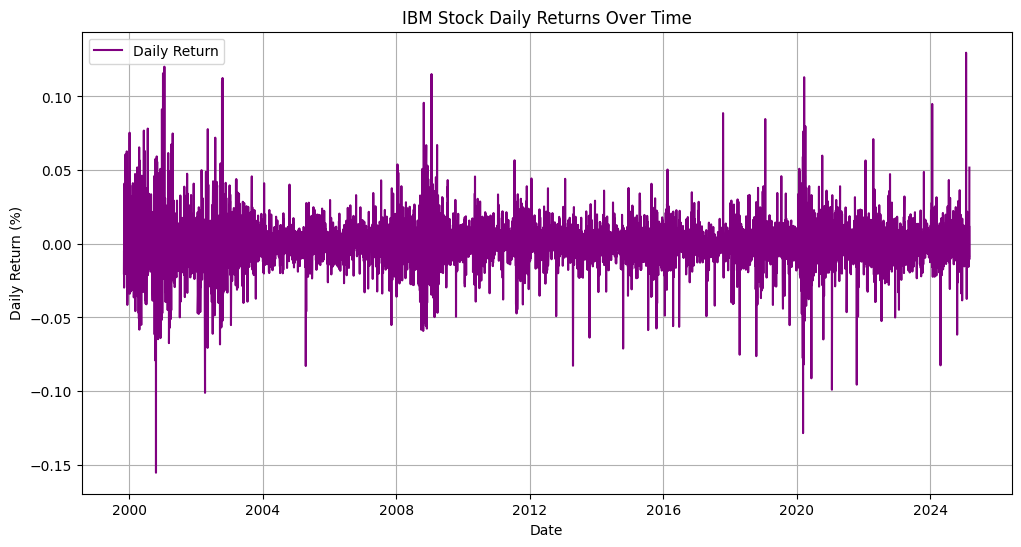

In [13]:
# Daily return
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return', color='purple')
plt.title('IBM Stock Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Result visualization
results = {
    "lightgbm": {"train_mse": 0.49, "test_mse": 56.36, "train_r2": 1.00, "test_r2": 0.95},
    "random_forest": {"train_mse": 0.10, "test_mse": 45.82, "train_r2": 1.00, "test_r2": 0.96},
    "xgboost": {"train_mse": 0.28, "test_mse": 51.86, "train_r2": 1.00, "test_r2": 0.95},
    "arima": {"train_mse": 5.55, "test_mse": 1129.00, "train_r2": 1.00, "test_r2": -0.02}
}

models = list(results.keys())
train_mse = [results[m]["train_mse"] for m in models]
test_mse = [results[m]["test_mse"] for m in models]
train_r2 = [results[m]["train_r2"] for m in models]
test_r2 = [results[m]["test_r2"] for m in models]

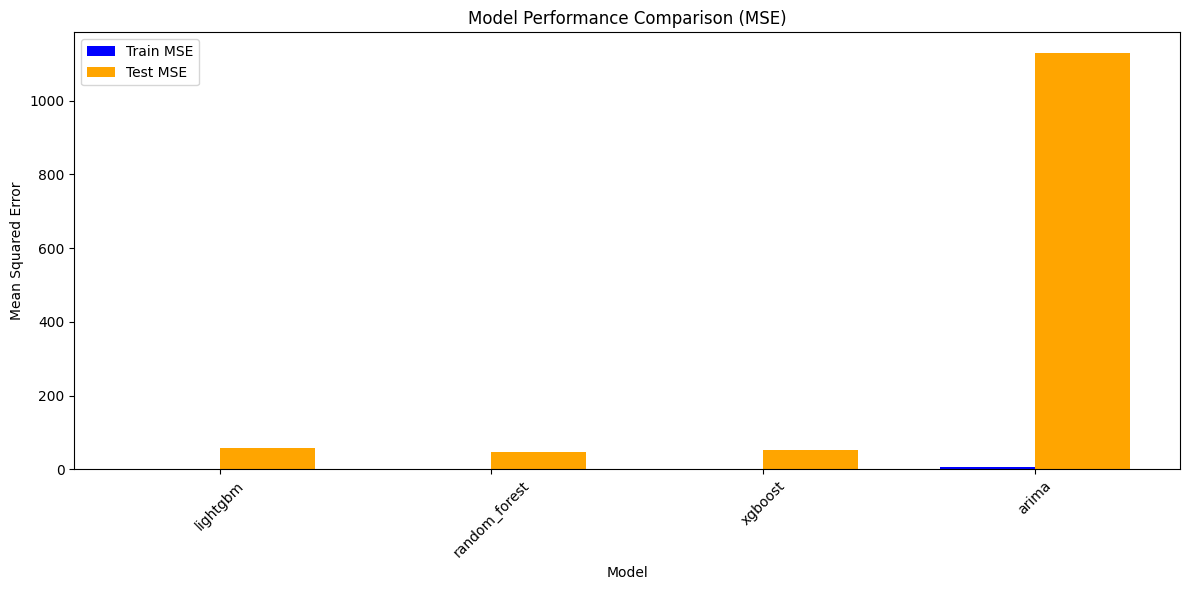

In [15]:
# Bar plot for MSE
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, train_mse, bar_width, label='Train MSE', color='blue')
plt.bar([i + bar_width for i in index], test_mse, bar_width, label='Test MSE', color='orange')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison (MSE)')
plt.xticks([i + bar_width/2 for i in index], models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

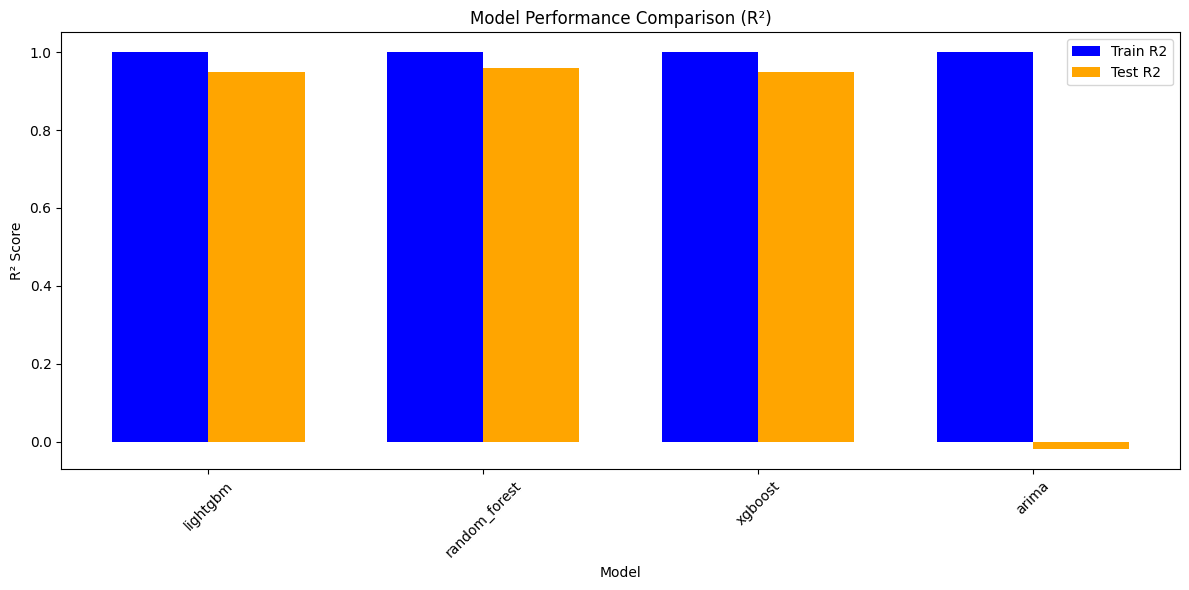

In [16]:
# Bar plot for R²
plt.figure(figsize=(12, 6))
plt.bar(index, train_r2, bar_width, label='Train R2', color='blue')
plt.bar([i + bar_width for i in index], test_r2, bar_width, label='Test R2', color='orange')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison (R²)')
plt.xticks([i + bar_width/2 for i in index], models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()